In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Указание путей

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Количество классов

In [3]:
NUM_CLASSES = 6

# Длинна пути

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# Считывание датасета

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Построение модели

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,108
Trainable params: 1,108
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Сallback чекпоинтов модели
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback для ранней остановки
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# настройки обучения
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
33/33 [==============================] - ETA: 0s - loss: 1.7937 - accuracy: 0.3227 
Epoch 1: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 1s 10ms/step - loss: 1.7937 - accuracy: 0.3227 - val_loss: 1.7602 - val_accuracy: 0.4797
Epoch 2/1000
32/33 [============================>.] - ETA: 0s - loss: 1.7460 - accuracy: 0.3403
Epoch 2: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 1.7458 - accuracy: 0.3394 - val_loss: 1.7165 - val_accuracy: 0.2391
Epoch 3/1000
31/33 [===========================>..] - ETA: 0s - loss: 1.6986 - accuracy: 0.3009
Epoch 3: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 1.6973 - accuracy: 0.3014 - val_loss: 1.6628 - val_accuracy: 0.2391
Epoch 4/1000
 1/33 [..............................] - ETA: 0s - l

30/33 [==========================>...] - ETA: 0s - loss: 0.8250 - accuracy: 0.7018
Epoch 27: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 5ms/step - loss: 0.8268 - accuracy: 0.7020 - val_loss: 0.6163 - val_accuracy: 0.8862
Epoch 28/1000
16/33 [=============>................] - ETA: 0s - loss: 0.8535 - accuracy: 0.6963
Epoch 28: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 5ms/step - loss: 0.8496 - accuracy: 0.6882 - val_loss: 0.6104 - val_accuracy: 0.8891
Epoch 29/1000
31/33 [===========================>..] - ETA: 0s - loss: 0.8196 - accuracy: 0.7034
Epoch 29: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.8180 - accuracy: 0.7039 - val_loss: 0.5907 - val_accuracy: 0.8884
Epoch 30/1000
29/33 [=========================>....] - ETA: 0s - loss: 0.80

 1/33 [..............................] - ETA: 0s - loss: 0.7288 - accuracy: 0.7500
Epoch 53: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.7614 - val_loss: 0.4216 - val_accuracy: 0.9043
Epoch 54/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6751 - accuracy: 0.7266
Epoch 54: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.7450 - val_loss: 0.4187 - val_accuracy: 0.9072
Epoch 55/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7075 - accuracy: 0.7656
Epoch 55: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.7532 - val_loss: 0.4172 - val_accuracy: 0.9043
Epoch 56/1000
 1/33 [..............................] - ETA: 0s - loss: 0.64

 1/33 [..............................] - ETA: 0s - loss: 0.7567 - accuracy: 0.7031
Epoch 79: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7701 - val_loss: 0.3633 - val_accuracy: 0.9065
Epoch 80/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7348 - accuracy: 0.7266
Epoch 80: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7672 - val_loss: 0.3596 - val_accuracy: 0.9058
Epoch 81/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6074 - accuracy: 0.8047
Epoch 81: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7723 - val_loss: 0.3578 - val_accuracy: 0.9058
Epoch 82/1000
 1/33 [..............................] - ETA: 0s - loss: 0.61

 1/33 [..............................] - ETA: 0s - loss: 0.7672 - accuracy: 0.7188
Epoch 105: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7771 - val_loss: 0.3328 - val_accuracy: 0.9101
Epoch 106/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5594 - accuracy: 0.8125
Epoch 106: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7786 - val_loss: 0.3351 - val_accuracy: 0.9130
Epoch 107/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6438 - accuracy: 0.7734
Epoch 107: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7757 - val_loss: 0.3338 - val_accuracy: 0.9087
Epoch 108/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.4534 - accuracy: 0.8281
Epoch 131: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.7866 - val_loss: 0.3133 - val_accuracy: 0.9123
Epoch 132/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5323 - accuracy: 0.7969
Epoch 132: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.7764 - val_loss: 0.3163 - val_accuracy: 0.9145
Epoch 133/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5907 - accuracy: 0.7578
Epoch 133: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.7781 - val_loss: 0.3154 - val_accuracy: 0.9130
Epoch 134/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.4278 - accuracy: 0.8516
Epoch 157: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.5711 - accuracy: 0.7943 - val_loss: 0.3014 - val_accuracy: 0.9167
Epoch 158/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6422 - accuracy: 0.7578
Epoch 158: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7916 - val_loss: 0.2964 - val_accuracy: 0.9217
Epoch 159/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5515 - accuracy: 0.7500
Epoch 159: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7827 - val_loss: 0.2973 - val_accuracy: 0.9196
Epoch 160/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.5189 - accuracy: 0.8281
Epoch 183: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7892 - val_loss: 0.2858 - val_accuracy: 0.9268
Epoch 184/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6174 - accuracy: 0.7344
Epoch 184: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7945 - val_loss: 0.2886 - val_accuracy: 0.9254
Epoch 185/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6381 - accuracy: 0.7734
Epoch 185: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.7904 - val_loss: 0.2846 - val_accuracy: 0.9239
Epoch 186/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.6218 - accuracy: 0.7656
Epoch 209: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7967 - val_loss: 0.2721 - val_accuracy: 0.9297
Epoch 210/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5065 - accuracy: 0.8672
Epoch 210: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.8061 - val_loss: 0.2683 - val_accuracy: 0.9326
Epoch 211/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6005 - accuracy: 0.7656
Epoch 211: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7972 - val_loss: 0.2742 - val_accuracy: 0.9275
Epoch 212/1000
29/33 [=========================>....] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.5457 - accuracy: 0.7812
Epoch 235: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.8025 - val_loss: 0.2634 - val_accuracy: 0.9312
Epoch 236/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4549 - accuracy: 0.8359
Epoch 236: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7996 - val_loss: 0.2675 - val_accuracy: 0.9348
Epoch 237/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4754 - accuracy: 0.8125
Epoch 237: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.8035 - val_loss: 0.2614 - val_accuracy: 0.9355
Epoch 238/1000
 1/33 [..............................] - ETA: 0s - loss

25/33 [=====================>........] - ETA: 0s - loss: 0.5417 - accuracy: 0.8031
Epoch 261: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.5427 - accuracy: 0.8064 - val_loss: 0.2526 - val_accuracy: 0.9348
Epoch 262/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5685 - accuracy: 0.8125
Epoch 262: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.5249 - accuracy: 0.8119 - val_loss: 0.2540 - val_accuracy: 0.9333
Epoch 263/1000
25/33 [=====================>........] - ETA: 0s - loss: 0.5154 - accuracy: 0.8150
Epoch 263: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.5192 - accuracy: 0.8131 - val_loss: 0.2528 - val_accuracy: 0.9348
Epoch 264/1000
31/33 [===========================>..] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8828
Epoch 287: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.8083 - val_loss: 0.2478 - val_accuracy: 0.9333
Epoch 288/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5277 - accuracy: 0.8125
Epoch 288: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.8071 - val_loss: 0.2495 - val_accuracy: 0.9348
Epoch 289/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5329 - accuracy: 0.8203
Epoch 289: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.8018 - val_loss: 0.2481 - val_accuracy: 0.9362
Epoch 290/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7578
Epoch 313: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.8151 - val_loss: 0.2416 - val_accuracy: 0.9341
Epoch 314/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6634 - accuracy: 0.7422
Epoch 314: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.8134 - val_loss: 0.2425 - val_accuracy: 0.9377
Epoch 315/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7500
Epoch 315: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.8102 - val_loss: 0.2405 - val_accuracy: 0.9384
Epoch 316/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.6370 - accuracy: 0.7578
Epoch 339: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.8071 - val_loss: 0.2354 - val_accuracy: 0.9362
Epoch 340/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7734
Epoch 340: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.8083 - val_loss: 0.2368 - val_accuracy: 0.9355
Epoch 341/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7180 - accuracy: 0.7500
Epoch 341: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.8061 - val_loss: 0.2376 - val_accuracy: 0.9326
Epoch 342/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.4801 - accuracy: 0.8203
Epoch 365: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.8141 - val_loss: 0.2336 - val_accuracy: 0.9406
Epoch 366/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5653 - accuracy: 0.8203
Epoch 366: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.8095 - val_loss: 0.2344 - val_accuracy: 0.9413
Epoch 367/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4809 - accuracy: 0.8203
Epoch 367: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.8088 - val_loss: 0.2327 - val_accuracy: 0.9413
Epoch 368/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8672
Epoch 391: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.8139 - val_loss: 0.2300 - val_accuracy: 0.9413
Epoch 392/1000
 1/33 [..............................] - ETA: 0s - loss: 0.3891 - accuracy: 0.8516
Epoch 392: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.8148 - val_loss: 0.2284 - val_accuracy: 0.9406
Epoch 393/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4407 - accuracy: 0.8438
Epoch 393: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.8093 - val_loss: 0.2301 - val_accuracy: 0.9406
Epoch 394/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.4900 - accuracy: 0.8281
Epoch 417: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.8069 - val_loss: 0.2270 - val_accuracy: 0.9406
Epoch 418/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5188 - accuracy: 0.8047
Epoch 418: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8177 - val_loss: 0.2266 - val_accuracy: 0.9442
Epoch 419/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7656
Epoch 419: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.8088 - val_loss: 0.2295 - val_accuracy: 0.9420
Epoch 420/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.4586 - accuracy: 0.8438
Epoch 443: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.8284 - val_loss: 0.2242 - val_accuracy: 0.9406
Epoch 444/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5734 - accuracy: 0.7656
Epoch 444: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.8156 - val_loss: 0.2244 - val_accuracy: 0.9413
Epoch 445/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4812 - accuracy: 0.8203
Epoch 445: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.8209 - val_loss: 0.2226 - val_accuracy: 0.9399
Epoch 446/1000
 1/33 [..............................] - ETA: 0s - loss

26/33 [======================>.......] - ETA: 0s - loss: 0.5048 - accuracy: 0.8170
Epoch 469: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.8163 - val_loss: 0.2240 - val_accuracy: 0.9449
Epoch 470/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4936 - accuracy: 0.8359
Epoch 470: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.8243 - val_loss: 0.2253 - val_accuracy: 0.9406
Epoch 471/1000
28/33 [========================>.....] - ETA: 0s - loss: 0.4810 - accuracy: 0.8273
Epoch 471: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.8255 - val_loss: 0.2229 - val_accuracy: 0.9449
Epoch 472/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.6670 - accuracy: 0.8125
Epoch 495: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8182 - val_loss: 0.2163 - val_accuracy: 0.9464
Epoch 496/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5274 - accuracy: 0.8125
Epoch 496: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8221 - val_loss: 0.2162 - val_accuracy: 0.9457
Epoch 497/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6235 - accuracy: 0.7734
Epoch 497: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.8269 - val_loss: 0.2160 - val_accuracy: 0.9449
Epoch 498/1000
26/33 [======================>.......] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.4210 - accuracy: 0.8516
Epoch 521: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.8202 - val_loss: 0.2168 - val_accuracy: 0.9449
Epoch 522/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4992 - accuracy: 0.8438
Epoch 522: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.8327 - val_loss: 0.2135 - val_accuracy: 0.9435
Epoch 523/1000
 1/33 [..............................] - ETA: 0s - loss: 0.4249 - accuracy: 0.8047
Epoch 523: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.8231 - val_loss: 0.2137 - val_accuracy: 0.9457
Epoch 524/1000
 1/33 [..............................] - ETA: 0s - loss

 1/33 [..............................] - ETA: 0s - loss: 0.5473 - accuracy: 0.8047
Epoch 547: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.8187 - val_loss: 0.2156 - val_accuracy: 0.9442
Epoch 548/1000
15/33 [============>.................] - ETA: 0s - loss: 0.4773 - accuracy: 0.8281
Epoch 548: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.8211 - val_loss: 0.2152 - val_accuracy: 0.9442
Epoch 549/1000
 1/33 [..............................] - ETA: 0s - loss: 0.5476 - accuracy: 0.7812
Epoch 549: saving model to model/point_history_classifier\point_history_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.8279 - val_loss: 0.2139 - val_accuracy: 0.9471
Epoch 550/1000
 1/33 [..............................] - ETA: 0s - loss

In [13]:
# Сохранение модели
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Заключительный тест
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[3.4086703e-10 9.5685607e-01 3.9144633e-03 3.6212191e-02 8.3170360e-04
 2.1855661e-03]
1


# Матрица корелляций

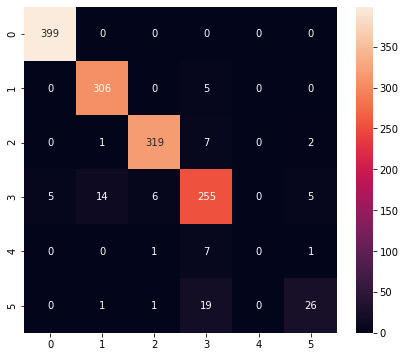

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       399
           1       0.95      0.98      0.97       311
           2       0.98      0.97      0.97       329
           3       0.87      0.89      0.88       285
           4       0.00      0.00      0.00         9
           5       0.76      0.55      0.64        47

    accuracy                           0.95      1380
   macro avg       0.76      0.73      0.74      1380
weighted avg       0.94      0.95      0.94      1380



D:\anacond\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacond\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anacond\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Конвертация модели в сжатый формат
Tensorflow-Lite

In [16]:
# Сохранение модели
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# Преобразование модели (квантование)
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\aalap\AppData\Local\Temp\tmpq4hunsx5\assets


6384

## Заключительный тест

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Получить I / O тензор
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Имплементация
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.4086634e-10 9.5685595e-01 3.9144643e-03 3.6212198e-02 8.3170383e-04
 2.1855657e-03]
1
